In [687]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%tensorflow_version 2.x

In [688]:
def genData_video(datapoints):
  base = np.linspace(0, 2 *np.pi, datapoints) 
  train_y = np.array([(np.sin(base) + 1) / 2, (sig.sawtooth(base) + 1) / 2, (sig.sawtooth(base, 1 / 2) + 1) / 2, (sig.square(base) + 1) / 2])
  train_x = base - base.min()
  train_x = train_x / train_x.max()
  return train_x.reshape(-1,1), np.transpose(train_y)

In [689]:
inp, out = genData_video(40000)

In [690]:
from tensorflow.keras.layers import Dense

def modelo_video(input_tr):
  modelo = tf.keras.Sequential(name='Modelo_videoclase')
  modelo.add(Dense(128,input_shape=[1], activation='relu'))
  modelo.add(Dense(128, activation='relu'))
  modelo.add(Dense(128, activation='relu'))
  modelo.add(Dense(32, activation='relu'))
  modelo.add(Dense(4, activation='relu'))

  modelo.compile(optimizer='adam', loss='mse', metrics=['mse'])

  return modelo

In [691]:
gen_seno = modelo_video(inp)

In [692]:
gen_seno.summary()

Model: "Modelo_videoclase"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 128)               256       
_________________________________________________________________
dense_292 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_293 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_294 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_295 (Dense)            (None, 4)                 132       
Total params: 37,540
Trainable params: 37,540
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = gen_seno.fit(inp, out, epochs=100 , batch_size=64, verbose=2)

In [673]:
gen_seno.save('modeloPractica6_v2.hdf5')
gen_seno.save_weights('pesosPractica6_v2.hdf5')

In [685]:
def generadorNet(frecuencia = 1, dataPointsPerCiclo = 8, naturaleza = 'seno', graficar = False):
  t = np.linspace(0, 2 * np.pi, dataPointsPerCiclo)
  t = np.subtract(t, t.min())
  t = np.divide(t, t.max())
  
  signal = gen_seno(t)

  for f in range(1, frecuencia):
    signal = np.concatenate([signal, gen_seno(t)])
  
  if graficar and naturaleza == 'todas':
    plt.figure(figsize=(20,8))

    for i in range(4):
      plt.subplot(4, 1, i + 1)
      plt.plot(signal[:,i])
    plt.suptitle('Approximated Signals')
    return 

  if naturaleza == 'seno':
    signal_out = signal[:, 0]
    if graficar:
      plt.figure(figsize=(20,5))
      plt.plot(signal_out)
      return

  if naturaleza == 'sierra':
    signal_out = signal[:, 1]
    if graficar:
      plt.figure(figsize=(20,5))
      plt.plot(signal_out)
      return

  if naturaleza == 'triangular':
    signal_out = signal[:, 2]
    if graficar:
      plt.figure(figsize=(20,5))
      plt.plot(signal_out)
      return
  
  if naturaleza == 'cuadrada':
    signal_out = signal[:, 3]
    if graficar:
      plt.figure(figsize=(20,5))
      plt.plot(signal_out)
      return
  
  if naturaleza == 'todas':
    return signal[:, 0], signal[:, 1], signal[:, 2], signal[:, 3]


  return signal_out

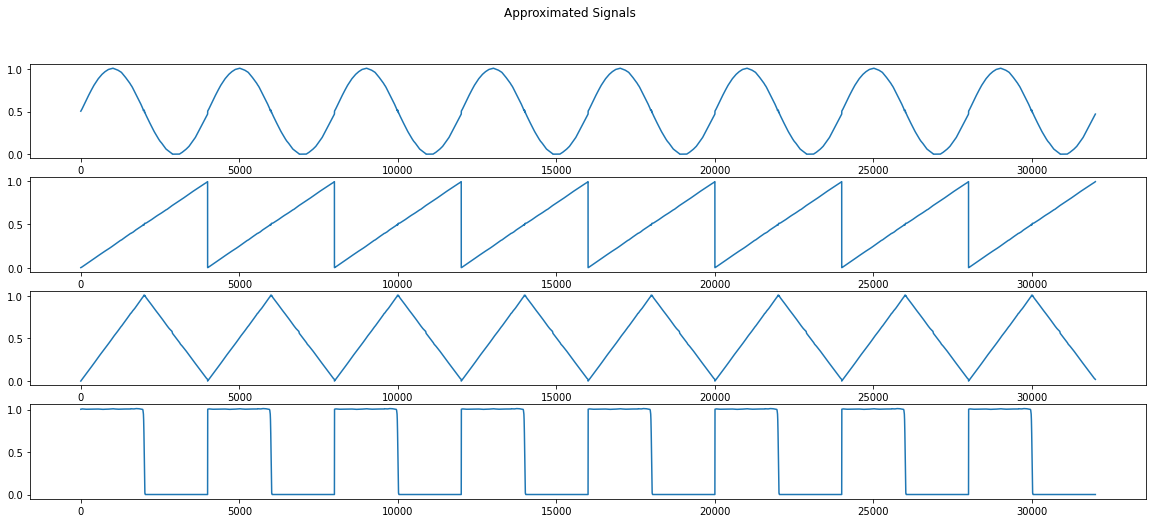

In [686]:
generadorNet(8, 4000, 'todas', True)